In [2]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv


--2024-07-24 16:57:51--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv.1’

goemotions_1.csv.1  100%[===================>]  13.52M  39.7MB/s    in 0.3s    

2024-07-24 16:57:52 (39.7 MB/s) - ‘data/full_dataset/goemotions_1.csv.1’ saved [14174600/14174600]

--2024-07-24 16:57:52--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting r

In [ ]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv('data/full_dataset/goemotions_1.csv')
df2 = pd.read_csv('data/full_dataset/goemotions_2.csv')
df3 = pd.read_csv('data/full_dataset/goemotions_3.csv')

# Combine the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Display the first few rows
print(df.head())

# Display the columns
print(df.columns)


                                                text       id  \
0                                    That game hurt.  eew5j0j   
1   >sexuality shouldn’t be a grouping category I...  eemcysk   
2     You do right, if you don't care then fuck 'em!  ed2mah1   
3                                 Man I love reddit.  eeibobj   
4  [NAME] was nowhere near them, he was by the Fa...  eda6yn6   

                author            subreddit    link_id   parent_id  \
0                Brdd9                  nrl  t3_ajis4z  t1_eew18eq   
1          TheGreen888     unpopularopinion  t3_ai4q37   t3_ai4q37   
2             Labalool          confessions  t3_abru74  t1_ed2m7g7   
3        MrsRobertshaw             facepalm  t3_ahulml   t3_ahulml   
4  American_Fascist713  starwarsspeculation  t3_ackt2f  t1_eda65q2   

    created_utc  rater_id  example_very_unclear  admiration  ...  love  \
0  1.548381e+09         1                 False           0  ...     0   
1  1.548084e+09        37               

In [ ]:
print(len(df))

211225


In [ ]:
import pandas as pd
import re


# Define the mapping dictionary
emotion_map = {
    "anger": ["anger", "annoyance", "disapproval"],
    "disgust": ["disgust"],
    "fear": ["fear", "nervousness"],
    "joy": ["joy", "amusement", "approval", "excitement", "gratitude", "love", "optimism", "relief", "pride", "admiration", "desire", "caring"],
    "sadness": ["sadness", "disappointment", "embarrassment", "grief", "remorse"],
    "surprise": ["surprise", "realization", "confusion", "curiosity"]
}

# Reverse the mapping to facilitate easy lookup
reverse_emotion_map = {detail: broad for broad, details in emotion_map.items() for detail in details}

# Combine emotion categories into a single list
emotion_categories = list(reverse_emotion_map.keys())

# Create a new column for broad emotions
def map_emotions(emotion_row):
    broad_emotions = set()
    for detail_emotion in emotion_categories:
        if emotion_row.get(detail_emotion, 0) == 1:
            broad_emotions.add(reverse_emotion_map[detail_emotion])
    if broad_emotions:
        return list(broad_emotions)[0]
    return None

# Apply the mapping function
df['broad_emotions'] = df.apply(map_emotions, axis=1)

# Keep only relevant columns
df = df[['text', 'broad_emotions']]

# Filter out rows with None values in broad_emotions
df = df.dropna(subset=['broad_emotions'])

# Display the first few rows
print(df.head())


                                                text broad_emotions
0                                    That game hurt.        sadness
3                                 Man I love reddit.            joy
5  Right? Considering it’s such an important docu...            joy
6  He isn't as big, but he's still quite popular....          anger
7  That's crazy; I went to a super [RELIGION] hig...            joy


In [ ]:
len(df)

152516

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your dataframe with text and broad_emotions

# Split the data into training, validation, and test sets
train_data, temp_data = train_test_split(df, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print the sizes of each set
print(f'Training set size: {train_data.shape[0]}')
print(f'Validation set size: {val_data.shape[0]}')
print(f'Test set size: {test_data.shape[0]}')

# Save the dataframes to CSV files
train_data.to_csv('data/full_dataset/train_data.csv', index=False)
val_data.to_csv('data/full_dataset/val_data.csv', index=False)
test_data.to_csv('data/full_dataset/test_data.csv', index=False)

print("CSV files have been saved successfully.")


Training set size: 122012
Validation set size: 15252
Test set size: 15252
CSV files have been saved successfully.


In [ ]:
import random
class Sentiment:
    sadness="sadness"
    joy="joy"
    surprise="surprise"
    anger="anger"
    fear="fear"


class Review:
    def __init__(self,text,label):
        self.text=text
        self.label=label


In [ ]:

class Review_container:
    def __init__(self,reviews):
        self.reviews=reviews

    def get_text(self):
        return [i.text for i in self.reviews]
    def get_sentiment(self):
        return [i.label for i in self.reviews]

    def evenly_distributed(self):
        sadness=list(filter(lambda x:x.label==Sentiment.sadness,self.reviews))
        joy=list(filter(lambda x:x.label==Sentiment.joy,self.reviews))
        anger=list(filter(lambda x:x.label==Sentiment.anger,self.reviews))
        fear=list(filter(lambda x:x.label==Sentiment.fear,self.reviews))
        surprise=list(filter(lambda x:x.label==Sentiment.surprise,self.reviews))

        min_count=min([len(sadness),len(joy),len(anger),len(fear),len(surprise)])
        print([len(sadness),len(joy),len(anger),len(fear),len(surprise)])
        sadness=sadness[:min_count]
        joy=joy[:min_count]
        anger=anger[:min_count]
        fear=fear[:min_count]
        surprise=surprise[:min_count]
        self.reviews=sadness+joy+anger+fear+surprise
        random.shuffle(self.reviews)



In [ ]:
import pandas as pd
df_train=pd.read_csv(r"/content/data/full_dataset/train_data.csv")
df_val=pd.read_csv(r"/content/data/full_dataset/val_data.csv")
df_test=pd.read_csv(r"/content/data/full_dataset/test_data.csv")


In [ ]:
df_train

,text,broad_emotions
0,You’ve been planning this for a while huh?,surprise
1,A true internet classic.,joy
2,"What a transition...from ""Ab-Fab"" to ""Au-Bo"" :...",surprise
3,> pushed all of them Hey dumbass you pushed th...,anger
4,"Thank you, agreed.",joy
...,...,...
122007,Given the situation I actually think it was th...,joy
122008,"Yay, I hope so! I'm feeling good about this de...",joy
122009,"Because it was a cool video it was sweet, and ...",joy
122010,Sexual frustration.,anger


In [ ]:
train_reviews=[]
val_reviews=[]
test_reviews=[]
for index,rows in df_train.iterrows():
    train_reviews.append(Review(rows['text'],rows['broad_emotions']))

for index,rows in df_val.iterrows():
    val_reviews.append(Review(rows['text'],rows['broad_emotions']))

for index,rows in df_test.iterrows():
    test_reviews.append(Review(rows['text'],rows['broad_emotions']))

In [ ]:
training_data=train_reviews
validation_data=val_reviews
testing_data=test_reviews

In [ ]:
train_container=Review_container(training_data)
val_container=Review_container(validation_data)
test_container=Review_container(testing_data)
train_container.evenly_distributed()
test_container.evenly_distributed()
val_container.evenly_distributed()
train_x=train_container.get_text()
train_y=train_container.get_sentiment()
test_x=test_container.get_text()
test_y=test_container.get_sentiment()
val_x=val_container.get_text()
val_y=val_container.get_sentiment()
print(val_y.count(Sentiment.sadness))

[12932, 65961, 19817, 2373, 16685]
[1629, 8271, 2468, 303, 2064]
[1627, 8161, 2526, 283, 2128]
283


In [ ]:
import nltk
import pandas as pd
import numpy as np
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nlp = spacy.load("en_core_web_sm", disable='ner')

In [ ]:
from tqdm import tqdm
def preprocess_text(texts):
    # lemmatize the tokens and store them in a list
    processed_texts = []
    for doc in tqdm(nlp.pipe(texts)):
        lemmatized_tokens = [token.lemma_.lower() for token in doc if token.is_alpha and token.lemma_ not in nlp.Defaults.stop_words]

        # Join the lemmatized tokens into a string
        processed_text = " ".join(lemmatized_tokens)

        processed_texts.append(processed_text)

    return processed_texts

In [ ]:
train_x = preprocess_text(train_x)
test_x= preprocess_text(test_x)
val_x=preprocess_text(val_x)

11865it [00:17, 662.91it/s]
1515it [00:01, 816.55it/s]
1415it [00:01, 812.27it/s]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_x_vectors= vectorizer.fit_transform(train_x)
test_x_vectors=vectorizer.transform(test_x)
val_x_vectors=vectorizer.transform(val_x)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.001)
train_x_vectors_tf_idf=tfidf_vectorizer.fit_transform(train_x)
test_x_vectors_tf_idf=tfidf_vectorizer.transform(test_x)
val_x_vectors_tf_idf=tfidf_vectorizer.transform(val_x)

In [ ]:
print(len(tfidf_vectorizer.get_feature_names_out()))

904


In [ ]:
tfidf_ngram_vectorizer = TfidfVectorizer(min_df=0.001, ngram_range=(1, 4))
train_x_vectors_tf_idf_ngram=tfidf_ngram_vectorizer.fit_transform(train_x)
test_x_vectors_tf_idf_ngram=tfidf_ngram_vectorizer.transform(test_x)
val_x_vectors_tf_idf_ngram=tfidf_ngram_vectorizer.transform(val_x)

In [ ]:
print(len(tfidf_ngram_vectorizer.get_feature_names_out()))


932


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb1=GaussianNB()

gnb1.fit(train_x_vectors.toarray(),train_y)
gnb1.score(test_x_vectors.toarray(),test_y)


0.299009900990099

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb2=GaussianNB()

gnb2.fit(train_x_vectors_tf_idf.toarray(),train_y)
gnb2.score(test_x_vectors_tf_idf.toarray(),test_y)

0.366996699669967

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb3=GaussianNB()

gnb3.fit(train_x_vectors_tf_idf_ngram.toarray(),train_y)
gnb3.score(test_x_vectors_tf_idf_ngram.toarray(),test_y)

0.36237623762376237

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(multi_class='multinomial',max_iter=200)
lr1.fit(train_x_vectors,train_y)
lr1.score(test_x_vectors,test_y)

0.533993399339934

In [ ]:
from sklearn.linear_model import LogisticRegression
lr2=LogisticRegression(multi_class='multinomial',max_iter=200)
lr2.fit(train_x_vectors_tf_idf,train_y)
lr2.score(test_x_vectors_tf_idf,test_y)

0.49174917491749176

In [ ]:
from sklearn.linear_model import LogisticRegression
lr3=LogisticRegression(multi_class='multinomial',max_iter=200)
lr3.fit(train_x_vectors_tf_idf_ngram,train_y)
lr3.score(test_x_vectors_tf_idf_ngram,test_y)

0.4877887788778878

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_x_vectors, train_y)
rf_score = rf.score(test_x_vectors, test_y)
print(f"Random Forest Accuracy: {rf_score:.4f}")


Random Forest Accuracy: 0.5267


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(train_x_vectors_tf_idf, train_y)
rf_score2 = rf2.score(test_x_vectors_tf_idf, test_y)
print(f"Random Forest Accuracy: {rf_score2:.4f}")

Random Forest Accuracy: 0.4944


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf3.fit(train_x_vectors_tf_idf, train_y)
rf_score3 = rf3.score(test_x_vectors_tf_idf, test_y)
print(f"Random Forest Accuracy: {rf_score3:.4f}")

Random Forest Accuracy: 0.4944


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optimizer

In [ ]:
class FCN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size,dropout_rate):
        super(FCN,self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size
        self.dropout_rate=dropout_rate
        self.fc1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2=nn.Linear(hidden_size,output_size)
        # self.sigmoid=nn.Sigmoid()
        # self.softmax=nn.Softmax(dim=1)

    def forward(self,x):
        out=self.fc1(x)
        out=self.relu(out)
        out=self.dropout(out)
        out=self.fc2(out)
        # out=self.softmax(out)

        return out

In [ ]:
model=FCN(input_size=train_x_vectors.shape[1],hidden_size=64,output_size=5,dropout_rate=0.2)
# model1=SentimentRNN(input_size=train_x_vectors.shape[1],hidden_size=64,output_size=5,num_layers=3)
criterion=nn.CrossEntropyLoss()
optim=optimizer.Adam(model.parameters(),lr=0.001)

In [ ]:
from torch.utils.data import TensorDataset,DataLoader,Dataset

In [ ]:
class customdataset(Dataset):
    def __init__(self,text,label):
        self.text=text
        self.label=label

    def __len__(self):
        return len(self.text)

    def __getitem__(self,idx):
        text=self.text[idx]
        label=self.label[idx]

        return text,label




In [ ]:
features_train = torch.tensor(train_x_vectors.toarray(), dtype=torch.float32)
features_validation = torch.tensor(val_x_vectors.toarray(), dtype=torch.float32)
encoding={"sadness":0,"joy":1,"surprise":2,"anger":3,"fear":4}
train_y_encoded=[encoding[label] for label in train_y]
val_y_encoded=[encoding[label] for label in val_y]
test_y_encoded=[encoding[label] for label in test_y]
y_train = torch.tensor(train_y_encoded,dtype=torch.long)
y_validation = torch.tensor(val_y_encoded,dtype=torch.long)
train_tensor_dataset=TensorDataset(features_train,y_train)
val_tensor_dataset=TensorDataset(features_validation,y_validation)

In [ ]:
train_dataloader=DataLoader(train_tensor_dataset,batch_size=32,shuffle=True)
val_dataloader=DataLoader(val_tensor_dataset,batch_size=32,shuffle=True)


In [ ]:

train_epoch_loss=[]
val_epoch_loss=[]
val_accuracy=[]
epochs=100

for epoch in range(1,epochs+1):
    correct_val = 0
    total_val = 0
    train_loss=[]
    val_loss=[]
    for inputs,labels in tqdm(train_dataloader):
        model.train()
        optim.zero_grad()
        logits=model.forward(inputs)
        loss=criterion(logits,labels)
        loss.backward()
        optim.step()
        train_loss.append(loss.item())

    train_epoch_loss.append(sum(train_loss)/len(train_loss))

    with torch.no_grad():
        for inputs,labels in tqdm(val_dataloader):
            model.eval()
            logits=model.forward(inputs)
            loss=criterion(logits,labels)
            val_loss.append(loss.item())
            _, predicted = torch.max(logits, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

        val_epoch_loss.append(sum(val_loss)/len(val_loss))


    print("epoch==",epoch,"train_loss",sum(train_loss)/len(train_loss),"val_loss",sum(val_loss)/len(val_loss),"val_acc:",correct_val,total_val,(correct_val/total_val)*100)






100%|██████████| 45/45 [00:00<00:00, 431.00it/s]


epoch== 1 train_loss 1.4411287034618243 val_loss 1.238190934393141 val_acc: 768 1415 54.2756183745583


100%|██████████| 45/45 [00:00<00:00, 417.03it/s]


epoch== 2 train_loss 1.0388600908199732 val_loss 1.2133771379788716 val_acc: 763 1415 53.92226148409895


100%|██████████| 45/45 [00:00<00:00, 467.03it/s]


epoch== 3 train_loss 0.7991932057788108 val_loss 1.2992275185055202 val_acc: 754 1415 53.28621908127208


100%|██████████| 45/45 [00:00<00:00, 449.96it/s]


epoch== 4 train_loss 0.648667738162925 val_loss 1.3864506430096097 val_acc: 747 1415 52.791519434628974


100%|██████████| 45/45 [00:00<00:00, 136.60it/s]


epoch== 5 train_loss 0.5481015707283329 val_loss 1.5088619854715135 val_acc: 735 1415 51.9434628975265


100%|██████████| 45/45 [00:00<00:00, 458.21it/s]


epoch== 6 train_loss 0.4789111121806173 val_loss 1.5994624614715576 val_acc: 730 1415 51.590106007067135


100%|██████████| 45/45 [00:00<00:00, 323.66it/s]


epoch== 7 train_loss 0.4283671579511982 val_loss 1.6813602738910252 val_acc: 724 1415 51.1660777385159


100%|██████████| 45/45 [00:00<00:00, 434.96it/s]


epoch== 8 train_loss 0.39471152139641846 val_loss 1.795471645726098 val_acc: 705 1415 49.82332155477032


100%|██████████| 45/45 [00:00<00:00, 320.65it/s]


epoch== 9 train_loss 0.3648050210144963 val_loss 1.878424518638187 val_acc: 696 1415 49.187279151943464


100%|██████████| 45/45 [00:00<00:00, 175.62it/s]


epoch== 10 train_loss 0.34223130755026065 val_loss 1.949102567301856 val_acc: 700 1415 49.46996466431096


100%|██████████| 45/45 [00:00<00:00, 415.72it/s]


epoch== 11 train_loss 0.3257883816073847 val_loss 2.06083181169298 val_acc: 690 1415 48.76325088339223


100%|██████████| 45/45 [00:00<00:00, 148.81it/s]


epoch== 12 train_loss 0.3102167761631089 val_loss 2.1366356823179458 val_acc: 691 1415 48.8339222614841


100%|██████████| 45/45 [00:00<00:00, 173.03it/s]


epoch== 13 train_loss 0.29792023794549816 val_loss 2.2176100280549793 val_acc: 677 1415 47.84452296819788


100%|██████████| 45/45 [00:00<00:00, 431.15it/s]


epoch== 14 train_loss 0.2839237798176043 val_loss 2.2966963794496325 val_acc: 676 1415 47.773851590106005


100%|██████████| 45/45 [00:00<00:00, 461.65it/s]


epoch== 15 train_loss 0.27328521706103637 val_loss 2.393894690937466 val_acc: 676 1415 47.773851590106005


100%|██████████| 45/45 [00:00<00:00, 324.50it/s]


epoch== 16 train_loss 0.26327603550331613 val_loss 2.48973056740231 val_acc: 667 1415 47.13780918727915


100%|██████████| 45/45 [00:00<00:00, 466.88it/s]


epoch== 17 train_loss 0.25817206166584217 val_loss 2.5202191909154257 val_acc: 669 1415 47.2791519434629


100%|██████████| 45/45 [00:00<00:00, 479.88it/s]


epoch== 18 train_loss 0.24687354744605297 val_loss 2.5880059056811864 val_acc: 666 1415 47.06713780918728


100%|██████████| 45/45 [00:00<00:00, 315.74it/s]


epoch== 19 train_loss 0.24380911174769992 val_loss 2.6939564148585 val_acc: 672 1415 47.49116607773852


100%|██████████| 45/45 [00:00<00:00, 344.14it/s]


epoch== 20 train_loss 0.23508904791986845 val_loss 2.7396587954627143 val_acc: 681 1415 48.12720848056537


100%|██████████| 45/45 [00:00<00:00, 449.26it/s]


epoch== 21 train_loss 0.2305541385838767 val_loss 2.7650640712844 val_acc: 683 1415 48.26855123674912


100%|██████████| 45/45 [00:00<00:00, 461.78it/s]


epoch== 22 train_loss 0.22465377023840208 val_loss 2.8768347051408556 val_acc: 670 1415 47.349823321554766


100%|██████████| 45/45 [00:00<00:00, 401.54it/s]


epoch== 23 train_loss 0.22239645086530083 val_loss 2.937778271569146 val_acc: 661 1415 46.71378091872791


100%|██████████| 45/45 [00:00<00:00, 456.66it/s]


epoch== 24 train_loss 0.21824927485957138 val_loss 3.0437121444278294 val_acc: 665 1415 46.996466431095406


100%|██████████| 45/45 [00:00<00:00, 368.51it/s]


epoch== 25 train_loss 0.21165319011519057 val_loss 3.0617079549365576 val_acc: 669 1415 47.2791519434629


100%|██████████| 45/45 [00:00<00:00, 467.19it/s]


epoch== 26 train_loss 0.2088108100900753 val_loss 3.1489978790283204 val_acc: 667 1415 47.13780918727915


100%|██████████| 45/45 [00:00<00:00, 454.85it/s]


epoch== 27 train_loss 0.20838582749676832 val_loss 3.2041903919643824 val_acc: 669 1415 47.2791519434629


100%|██████████| 45/45 [00:00<00:00, 468.99it/s]


epoch== 28 train_loss 0.20330960878404486 val_loss 3.2033032894134523 val_acc: 663 1415 46.85512367491166


100%|██████████| 45/45 [00:00<00:00, 469.57it/s]


epoch== 29 train_loss 0.19873401171444963 val_loss 3.2749359316296047 val_acc: 662 1415 46.78445229681979


100%|██████████| 45/45 [00:00<00:00, 359.24it/s]


epoch== 30 train_loss 0.19718070712814112 val_loss 3.3157385190327964 val_acc: 662 1415 46.78445229681979


100%|██████████| 45/45 [00:00<00:00, 459.81it/s]


epoch== 31 train_loss 0.1939396047889383 val_loss 3.3780081907908124 val_acc: 653 1415 46.148409893992934


100%|██████████| 45/45 [00:00<00:00, 315.40it/s]


epoch== 32 train_loss 0.19202897599283256 val_loss 3.38751796219084 val_acc: 660 1415 46.64310954063604


100%|██████████| 45/45 [00:00<00:00, 464.46it/s]


epoch== 33 train_loss 0.1869704336570601 val_loss 3.495637027422587 val_acc: 668 1415 47.208480565371026


100%|██████████| 45/45 [00:00<00:00, 414.47it/s]


epoch== 34 train_loss 0.1855100870252941 val_loss 3.546700519985623 val_acc: 656 1415 46.36042402826855


100%|██████████| 45/45 [00:00<00:00, 403.28it/s]


epoch== 35 train_loss 0.18392240473212337 val_loss 3.654665390650431 val_acc: 657 1415 46.43109540636042


100%|██████████| 45/45 [00:00<00:00, 412.83it/s]


epoch== 36 train_loss 0.1841173613885784 val_loss 3.6883406665590073 val_acc: 657 1415 46.43109540636042


100%|██████████| 45/45 [00:00<00:00, 434.46it/s]


epoch== 37 train_loss 0.1803129097908695 val_loss 3.6953029685550267 val_acc: 662 1415 46.78445229681979


100%|██████████| 45/45 [00:00<00:00, 393.24it/s]


epoch== 38 train_loss 0.1767171434330129 val_loss 3.7206076516045465 val_acc: 655 1415 46.28975265017668


100%|██████████| 45/45 [00:00<00:00, 325.00it/s]


epoch== 39 train_loss 0.17675407240393187 val_loss 3.806675476498074 val_acc: 658 1415 46.5017667844523


100%|██████████| 45/45 [00:00<00:00, 407.76it/s]


epoch== 40 train_loss 0.17576116772815384 val_loss 3.8310340775383844 val_acc: 664 1415 46.92579505300353


100%|██████████| 45/45 [00:00<00:00, 389.79it/s]


epoch== 41 train_loss 0.1738240389439536 val_loss 3.9556885030534534 val_acc: 658 1415 46.5017667844523


100%|██████████| 45/45 [00:00<00:00, 452.82it/s]


epoch== 42 train_loss 0.17607150390001158 val_loss 3.936376937230428 val_acc: 653 1415 46.148409893992934


100%|██████████| 45/45 [00:00<00:00, 481.69it/s]


epoch== 43 train_loss 0.16875007323358418 val_loss 3.956624386045668 val_acc: 664 1415 46.92579505300353


100%|██████████| 45/45 [00:00<00:00, 286.49it/s]


epoch== 44 train_loss 0.17164824903011322 val_loss 4.056762075424194 val_acc: 658 1415 46.5017667844523


100%|██████████| 45/45 [00:00<00:00, 465.78it/s]


epoch== 45 train_loss 0.16619910064813584 val_loss 4.1021852175394695 val_acc: 646 1415 45.65371024734982


100%|██████████| 45/45 [00:00<00:00, 363.61it/s]


epoch== 46 train_loss 0.1663705074978927 val_loss 4.0614729146162665 val_acc: 653 1415 46.148409893992934


100%|██████████| 45/45 [00:00<00:00, 385.14it/s]


epoch== 47 train_loss 0.16561331179474964 val_loss 4.142492779095968 val_acc: 651 1415 46.00706713780919


100%|██████████| 45/45 [00:00<00:00, 428.21it/s]


epoch== 48 train_loss 0.15906045968943047 val_loss 4.2265181806352405 val_acc: 651 1415 46.00706713780919


100%|██████████| 45/45 [00:00<00:00, 442.44it/s]


epoch== 49 train_loss 0.16146211037813935 val_loss 4.393626120355394 val_acc: 649 1415 45.86572438162544


100%|██████████| 45/45 [00:00<00:00, 460.67it/s]


epoch== 50 train_loss 0.1597602983278968 val_loss 4.3128793398539225 val_acc: 654 1415 46.21908127208481


100%|██████████| 45/45 [00:00<00:00, 340.22it/s]


epoch== 51 train_loss 0.1579464021718727 val_loss 4.424018753899468 val_acc: 654 1415 46.21908127208481


100%|██████████| 45/45 [00:00<00:00, 464.07it/s]


epoch== 52 train_loss 0.15613351669413542 val_loss 4.417067692014906 val_acc: 656 1415 46.36042402826855


100%|██████████| 45/45 [00:00<00:00, 470.29it/s]


epoch== 53 train_loss 0.15834522833470305 val_loss 4.443685989909702 val_acc: 656 1415 46.36042402826855


100%|██████████| 45/45 [00:00<00:00, 455.04it/s]


epoch== 54 train_loss 0.1572334132611631 val_loss 4.44649945365058 val_acc: 658 1415 46.5017667844523


100%|██████████| 45/45 [00:00<00:00, 475.45it/s]


epoch== 55 train_loss 0.15744363308213952 val_loss 4.536062457826403 val_acc: 647 1415 45.724381625441694


100%|██████████| 45/45 [00:00<00:00, 456.03it/s]


epoch== 56 train_loss 0.1540424038299593 val_loss 4.563463197814094 val_acc: 652 1415 46.07773851590106


100%|██████████| 45/45 [00:00<00:00, 410.85it/s]


epoch== 57 train_loss 0.1542071197734207 val_loss 4.63465256690979 val_acc: 649 1415 45.86572438162544


100%|██████████| 45/45 [00:00<00:00, 280.29it/s]


epoch== 58 train_loss 0.15458880868963798 val_loss 4.608928351932102 val_acc: 646 1415 45.65371024734982


100%|██████████| 45/45 [00:00<00:00, 467.63it/s]


epoch== 59 train_loss 0.14938328660412056 val_loss 4.677485725614759 val_acc: 651 1415 46.00706713780919


100%|██████████| 45/45 [00:00<00:00, 344.38it/s]


epoch== 60 train_loss 0.1519455049586083 val_loss 4.6964371098412405 val_acc: 648 1415 45.79505300353357


100%|██████████| 45/45 [00:00<00:00, 474.68it/s]


epoch== 61 train_loss 0.14962967684884076 val_loss 4.805213684505887 val_acc: 649 1415 45.86572438162544


100%|██████████| 45/45 [00:00<00:00, 468.21it/s]


epoch== 62 train_loss 0.14977925466976036 val_loss 4.828453048070272 val_acc: 649 1415 45.86572438162544


100%|██████████| 45/45 [00:00<00:00, 457.99it/s]


epoch== 63 train_loss 0.15031239867581914 val_loss 4.740146133634779 val_acc: 645 1415 45.583038869257955


100%|██████████| 45/45 [00:00<00:00, 453.57it/s]


epoch== 64 train_loss 0.14864546945695126 val_loss 4.789319639735751 val_acc: 647 1415 45.724381625441694


100%|██████████| 45/45 [00:00<00:00, 259.37it/s]


epoch== 65 train_loss 0.15044507384237474 val_loss 4.820992347929213 val_acc: 656 1415 46.36042402826855


100%|██████████| 45/45 [00:00<00:00, 499.96it/s]


epoch== 66 train_loss 0.14772026192125767 val_loss 4.951486651102702 val_acc: 653 1415 46.148409893992934


100%|██████████| 45/45 [00:00<00:00, 322.19it/s]


epoch== 67 train_loss 0.1411314127713221 val_loss 4.938013495339288 val_acc: 644 1415 45.51236749116608


100%|██████████| 45/45 [00:00<00:00, 457.59it/s]


epoch== 68 train_loss 0.1468805398771946 val_loss 4.962991009818183 val_acc: 649 1415 45.86572438162544


100%|██████████| 45/45 [00:00<00:00, 390.95it/s]


epoch== 69 train_loss 0.1477979032003956 val_loss 4.993442233403524 val_acc: 652 1415 46.07773851590106


100%|██████████| 45/45 [00:00<00:00, 455.89it/s]


epoch== 70 train_loss 0.1453529208838297 val_loss 5.082346730762058 val_acc: 645 1415 45.583038869257955


100%|██████████| 45/45 [00:00<00:00, 411.55it/s]


epoch== 71 train_loss 0.14699418785306562 val_loss 4.990855264663696 val_acc: 647 1415 45.724381625441694


100%|██████████| 45/45 [00:00<00:00, 454.46it/s]


epoch== 72 train_loss 0.14216324101224784 val_loss 5.111877791086832 val_acc: 647 1415 45.724381625441694


100%|██████████| 45/45 [00:00<00:00, 452.33it/s]


epoch== 73 train_loss 0.14518635012862094 val_loss 5.054330772823757 val_acc: 649 1415 45.86572438162544


100%|██████████| 45/45 [00:00<00:00, 329.75it/s]


epoch== 74 train_loss 0.13870848787100007 val_loss 5.1644012398189965 val_acc: 653 1415 46.148409893992934


100%|██████████| 45/45 [00:00<00:00, 357.08it/s]


epoch== 75 train_loss 0.14034495553857776 val_loss 5.128740236494276 val_acc: 646 1415 45.65371024734982


100%|██████████| 45/45 [00:00<00:00, 463.05it/s]


epoch== 76 train_loss 0.14149669704662582 val_loss 5.266740661197239 val_acc: 656 1415 46.36042402826855


100%|██████████| 45/45 [00:00<00:00, 418.85it/s]


epoch== 77 train_loss 0.14102952574637675 val_loss 5.185538366105821 val_acc: 652 1415 46.07773851590106


100%|██████████| 45/45 [00:00<00:00, 471.87it/s]


epoch== 78 train_loss 0.14217488762402952 val_loss 5.227943399217394 val_acc: 651 1415 46.00706713780919


100%|██████████| 45/45 [00:00<00:00, 419.26it/s]


epoch== 79 train_loss 0.13981452256295518 val_loss 5.313336171044243 val_acc: 645 1415 45.583038869257955


100%|██████████| 45/45 [00:00<00:00, 458.32it/s]


epoch== 80 train_loss 0.13768998922333323 val_loss 5.247101672490438 val_acc: 645 1415 45.583038869257955


100%|██████████| 45/45 [00:00<00:00, 325.56it/s]


epoch== 81 train_loss 0.13898512545089436 val_loss 5.33005166583591 val_acc: 641 1415 45.30035335689046


100%|██████████| 45/45 [00:00<00:00, 479.49it/s]


epoch== 82 train_loss 0.1374893228315078 val_loss 5.369589291678535 val_acc: 650 1415 45.936395759717314


100%|██████████| 45/45 [00:00<00:00, 322.34it/s]


epoch== 83 train_loss 0.13983931612333841 val_loss 5.357682826783922 val_acc: 651 1415 46.00706713780919


100%|██████████| 45/45 [00:00<00:00, 465.42it/s]


epoch== 84 train_loss 0.1379129147694278 val_loss 5.469474898444282 val_acc: 650 1415 45.936395759717314


100%|██████████| 45/45 [00:00<00:00, 491.05it/s]


epoch== 85 train_loss 0.13613335670642254 val_loss 5.445536952548557 val_acc: 642 1415 45.371024734982335


100%|██████████| 45/45 [00:00<00:00, 473.95it/s]


epoch== 86 train_loss 0.13573718909676263 val_loss 5.482909732394749 val_acc: 644 1415 45.51236749116608


100%|██████████| 45/45 [00:00<00:00, 455.82it/s]


epoch== 87 train_loss 0.1360171636393309 val_loss 5.470556163787842 val_acc: 643 1415 45.4416961130742


100%|██████████| 45/45 [00:00<00:00, 337.65it/s]


epoch== 88 train_loss 0.13617849716981947 val_loss 5.429562566015456 val_acc: 644 1415 45.51236749116608


100%|██████████| 45/45 [00:00<00:00, 428.49it/s]


epoch== 89 train_loss 0.13315066219793226 val_loss 5.496888224283854 val_acc: 650 1415 45.936395759717314


100%|██████████| 45/45 [00:00<00:00, 362.17it/s]


epoch== 90 train_loss 0.1352329895286595 val_loss 5.6055435869428845 val_acc: 651 1415 46.00706713780919


100%|██████████| 45/45 [00:00<00:00, 381.03it/s]


epoch== 91 train_loss 0.13411009043073557 val_loss 5.641357808642917 val_acc: 652 1415 46.07773851590106


100%|██████████| 45/45 [00:00<00:00, 466.42it/s]


epoch== 92 train_loss 0.13443389188277352 val_loss 5.594424613316854 val_acc: 645 1415 45.583038869257955


100%|██████████| 45/45 [00:00<00:00, 466.40it/s]


epoch== 93 train_loss 0.13594988174289352 val_loss 5.580679257710774 val_acc: 651 1415 46.00706713780919


100%|██████████| 45/45 [00:00<00:00, 397.69it/s]


epoch== 94 train_loss 0.13333821354366115 val_loss 5.617276488410102 val_acc: 644 1415 45.51236749116608


100%|██████████| 45/45 [00:00<00:00, 354.47it/s]


epoch== 95 train_loss 0.13248495964303292 val_loss 5.644065454271105 val_acc: 650 1415 45.936395759717314


100%|██████████| 45/45 [00:00<00:00, 460.93it/s]


epoch== 96 train_loss 0.1328207951599501 val_loss 5.68086166911655 val_acc: 650 1415 45.936395759717314


100%|██████████| 45/45 [00:00<00:00, 328.58it/s]


epoch== 97 train_loss 0.13132986820722126 val_loss 5.6978360970815025 val_acc: 645 1415 45.583038869257955


100%|██████████| 45/45 [00:00<00:00, 417.65it/s]


epoch== 98 train_loss 0.13108681186072207 val_loss 5.716070074505276 val_acc: 649 1415 45.86572438162544


100%|██████████| 45/45 [00:00<00:00, 411.77it/s]


epoch== 99 train_loss 0.13304314930669742 val_loss 5.759357542461819 val_acc: 647 1415 45.724381625441694


100%|██████████| 45/45 [00:00<00:00, 452.95it/s]

epoch== 100 train_loss 0.13079378013800316 val_loss 5.715161360634697 val_acc: 648 1415 45.79505300353357


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=LogisticRegression(multi_class='multinomial'), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(train_x_vectors, train_y)

best_lr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'C': 0.1, 'max_iter': 200, 'solver': 'saga'}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = best_lr.predict(test_x_vectors)

accuracy = accuracy_score(test_y, predictions)
precision = precision_score(test_y, predictions, average='weighted')
recall = recall_score(test_y, predictions, average='weighted')
f1 = f1_score(test_y, predictions, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.5168
Precision: 0.5289
Recall: 0.5168
F1-Score: 0.5200


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_lr, train_x_vectors, train_y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")



Cross-Validation Accuracy: 0.5182 ± 0.0082


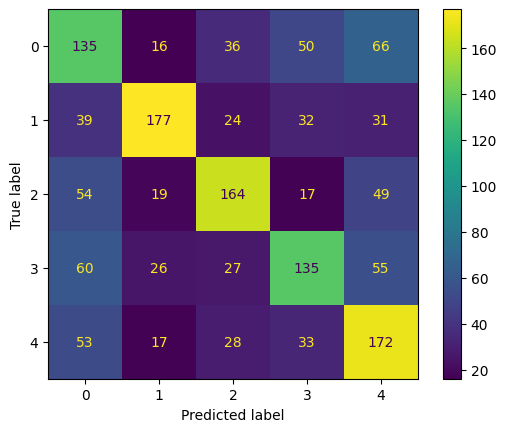

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(test_y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


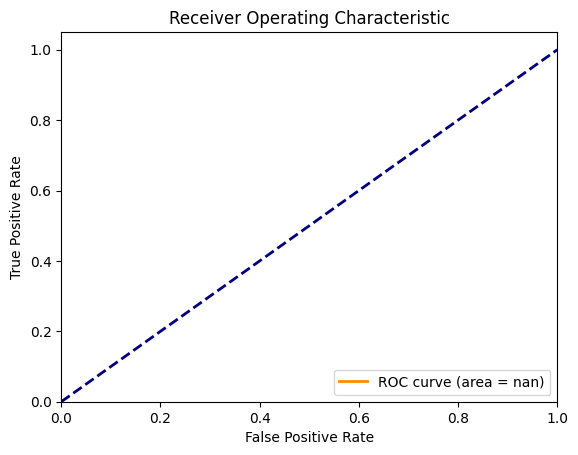

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

y_prob = best_lr.predict_proba(test_x_vectors)
fpr, tpr, _ = roc_curve(test_y, y_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Save the trained model
with open('best_lr_model.pkl', 'wb') as model_file:
    pickle.dump(best_lr, model_file)

# Load the trained model
with open('best_lr_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['features']])
    return jsonify(prediction=prediction[0])

if __name__ == '__main__':
    app.run(debug=True)



 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
